<a href="https://colab.research.google.com/github/jenyquist/geophysics_class/blob/main/Colab_Resistivity_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Laboratory:  Fundamentals of Electrical Resistivity

$$ \large V = \frac{\rho I}{2\pi r}$$

As we derived in class the voltage from a point source on the surface of a halfspace is given by the equation above.
Of course, you cannot have a positive current source without a negative current sink, so the actual voltage potential is the superposition of a source and a sink.

We are going to recreate figure 7.4 in the text. First we need a function that implements the equation above.

### Function source_sink

In [ ]:
def source_sink(x_source, x_sink, xlo=-100.0, xhi=100.0, zlo=-100.0, delta=1.0):
    """
    PURPOSE:
    This function inputs the x-coordinates of the source and sink
    and outputs the voltages on an nx by nz grid of points. The constant
    factor, (rho*I/2pi), is set to one because for a homogeneous earth this
    only scales the voltage up or down, but does not change the pattern
    of flow lines. 
    
    INPUTS:
    x_source --> the x coordinate of the source (meters)
    x_sink   --> the x coordinate of the sink (meters)
    xlo      --> minimum x coordinate of the grid (default is -100)
    xhi      --> maximum x coordinate of the grid (default is +100)
    zlo      --> the deepest limit of the grid(default is -100) 
                 Note: zhi is zero, the ground surface.
    delta    --> spacing between grid points
    
    OUTPUTS: 
    V        --> voltage at all the x, z, pairs
    xg       --> grid of x coordinates 
    zg       --> grid of z coordinates
    """
    
    import numpy as np
    
    zhi = 0.0 # ground surface
    z_source = 0.1 # raise the source off the grid to avoid zero distances
    z_sink = 0.1
    I = 100.0 # arbitrary current strength
    rho = 1000 # arbitrary halfspace resistivity
    
    # Define the grid
    x = np.arange(xlo, xhi, delta)
    z = np.arange(zlo, zhi, delta)
    xg, zg = np.meshgrid(x, z)
    
    r_source = np.sqrt((xg - x_source)**2 + (zg - z_source)**2)
    r_sink = np.sqrt((xg - x_sink)**2 + (zg - z_sink)**2)
    V_source = (rho * I)/(2 * np.pi * r_source) 
    V_sink = -(rho * I)/(2 * np.pi * r_sink) 
    V = V_source + V_sink
    return (xg, zg, V)

### Call the function and plot the voltages

In [ ]:
x, z, V = source_sink(-30, 30)

Text(0, 0.5, 'Depth (m)')

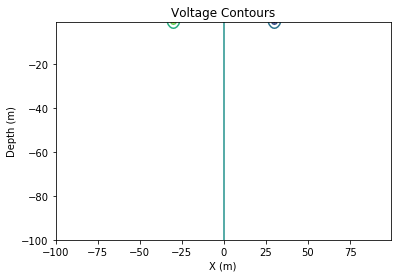

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.contour(x, z, V)
plt.title("Voltage Contours")
plt.xlabel("X (m)")
plt.ylabel("Depth (m)")

The plot is not very informative because the voltage drops off rapidly with distance. You need to use contours that are logarithmically spaced. Why is there a contour straight down the middle?

In [ ]:
loglev = np.arange(1, 8, 0.5)
pos_contours = 10**loglev
neg_contours = -1.0 * pos_contours
contour_levels = np.concatenate((pos_contours, neg_contours))
contour_levels = np.sort(contour_levels)

In [ ]:
print(contour_levels)

[-3.16227766e+07 -1.00000000e+07 -3.16227766e+06 -1.00000000e+06
 -3.16227766e+05 -1.00000000e+05 -3.16227766e+04 -1.00000000e+04
 -3.16227766e+03 -1.00000000e+03 -3.16227766e+02 -1.00000000e+02
 -3.16227766e+01 -1.00000000e+01  1.00000000e+01  3.16227766e+01
  1.00000000e+02  3.16227766e+02  1.00000000e+03  3.16227766e+03
  1.00000000e+04  3.16227766e+04  1.00000000e+05  3.16227766e+05
  1.00000000e+06  3.16227766e+06  1.00000000e+07  3.16227766e+07]


In [ ]:
np.min(V)

-14203.417518572189

Text(0, 0.5, 'Depth (m)')

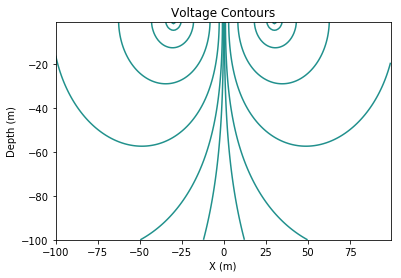

In [ ]:
plt.contour(x, z, V, contour_levels)
plt.title("Voltage Contours")
plt.xlabel("X (m)")
plt.ylabel("Depth (m)")

### Looking good!
Now lets make the figure a bit larger.
This will open the plot in its own window. Click the save button then open and print the image on a
full page.

In [ ]:
# open plot in its own window
%matplotlib 

plt.contour(x, z, V, contour_levels, figsize=(10,10))
plt.title("Voltage Contours")
plt.xlabel("X (m)")
plt.ylabel("Depth (m)")

Using matplotlib backend: Qt5Agg


Text(0, 0.5, 'Depth (m)')

Now I want you to print out this figure and draw in the current flow lines by hand (Yes, by hand, not with Python, although there is a way to do it.), then answer the following questions:

1.	Why did we need to use logarithmically spaced contours?
2.	What does this tell you about where most of the current is flowing?
3.	What happens to the current that is leaving the source in the opposite direction from the sink?
4.	How would the equipotentials change if we changed the resistivity?  The current?
5.	What would happen to the flow lines and equipotentials if you put a conductive heterogeneity at say (40,40)? 
6.	How about a resistive heterogeneity?
7.	If the source and sink were very close together, what would the equipotentials look like? 
(Hint, look on p450 in your text.)  It is only the equipotentials at the surface that we can measure though, so what would we see?
8.	What would be the effect on the equipotentials of a very resistive layer at depth 20?

### Now plot the voltages for a series of depth slices.
Execute the cell below for a variety of different values of n.
For the default grid size
n = 99 is right below the surface
n = 50 is mid way down
n = 100 is the deepest slice

Text(0, 0.5, 'Voltage (m)')

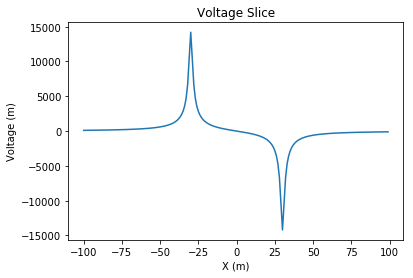

In [ ]:
# go back to plotting in the notebook
%matplotlib inline

n = 99
# x[n,:] slices row n (depth) and all the columns (x values)
plt.plot(x[n,:], V[n,:])  
plt.title("Voltage Slice")
plt.xlabel("X (m)")
plt.ylabel("Voltage (m)")

Finally, let's try to develop some intuition about what a resistivty profile might look like.  Assume we are collecting profile data with a 4-electrode system using  a dipole-dipole configuration. Sketch what you think will happen to the potential difference (P2-P1) as the survey passes over the conductive inheterogeneity.

You can hand in your answers if like, but either way, make sure you can answer as this is the sort of question I might ask on an exam.
